## Adaline vs Perceptron

In [25]:
import pandas as pd
from adaline.data import Adaline, plt, np
from perceptron.data import Perceptron, reproduce_x_times, unipolar, bipolar, x_bipolar, x_unipolar, d_unipolar, d_bipolar, get_random_except_first_row
plt.style.use('ggplot')

In [26]:
repetitions = 200

In [27]:
estimate_func_bipolar = lambda v: bipolar(0, v)
x_all_unipolar = reproduce_x_times(x_unipolar, repetitions)
x_all_bipolar = reproduce_x_times(x_bipolar, repetitions)
d_all_unipolar = reproduce_x_times(d_unipolar, repetitions)
d_all_bipolar = reproduce_x_times(d_bipolar, repetitions)
x_all_unipolar = x_all_unipolar + get_random_except_first_row(x_all_unipolar.shape)
x_all_bipolar = x_all_bipolar + get_random_except_first_row(x_all_bipolar.shape)
x_all_unipolar[:, :5], d_all_unipolar[:, :5], x_all_bipolar[:, :5], d_all_bipolar[:, :5]

(array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [-0.02264432, -0.01612371,  1.00320854,  1.03468248,  0.01879933],
        [-0.03370912,  0.96429724, -0.03939052,  1.04992473, -0.04717219]]),
 array([[0, 0, 0, 1, 0]]),
 array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [-0.95072497, -1.03068564,  0.96666832,  1.0315796 , -1.03751343],
        [-0.98458734,  1.01471832, -1.01101469,  0.9721719 , -1.03243529]]),
 array([[-1, -1, -1,  1, -1]]))

In [28]:
test_size = int(x_all_unipolar.shape[1] * 0.25)
train_size = int(x_all_unipolar.shape[1] - test_size)

In [29]:
x_train_unipolar, x_test_unipolar = x_all_unipolar[:, :train_size], x_all_unipolar[:, train_size:]
x_train_bipolar, x_test_bipolar = x_all_bipolar[:, :train_size], x_all_bipolar[:, train_size:]
d_train_unipolar, d_test_unipolar = d_all_unipolar[:, :train_size], d_all_unipolar[:, train_size:]
d_train_bipolar, d_test_bipolar = d_all_bipolar[:, :train_size], d_all_bipolar[:, train_size:]
x_train_unipolar.shape, x_test_unipolar.shape, d_train_unipolar.shape, d_test_unipolar.shape

((3, 600), (3, 200), (1, 600), (1, 200))

In [30]:
x_range = np.arange(-2, 4)
experiments_numb = 100

In [31]:
perceptrons_perceptron = []
adaline_perceptron = []
p = Perceptron(x_train_bipolar, d_train_bipolar, x_test_bipolar, d_test_bipolar, estimate_func_bipolar, 1.0, (-0.1, 0.1))
a = Adaline(x_train_unipolar, d_train_bipolar, x_test_unipolar, d_test_bipolar, 0.002, 0.8, (-0.1, 0.1))
for i in range(experiments_numb):
    p.count()
    a.count()
perceptrons_perceptron.append(p)
adaline_perceptron.append(a)
len(perceptrons_perceptron), len(adaline_perceptron)

(1, 1)

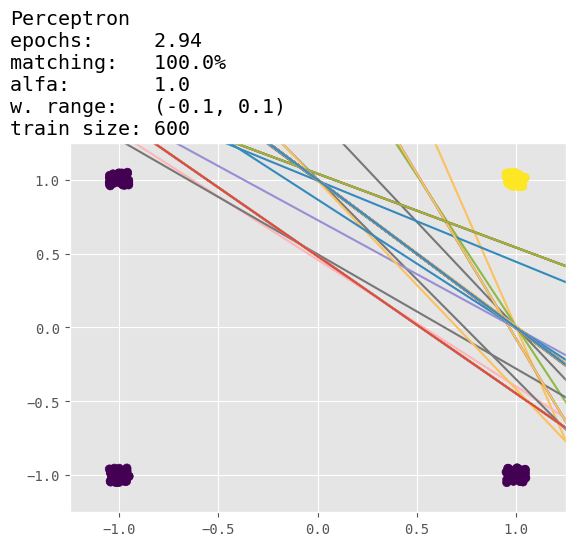

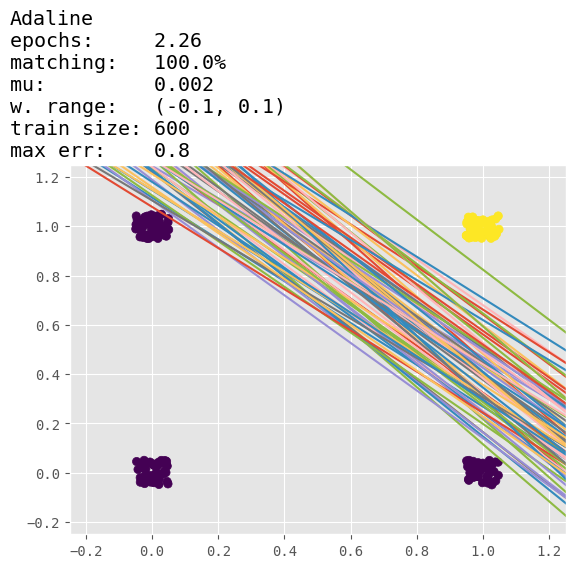

In [32]:
p.display()
a.display()